# <b>IFI 8420 - Assignment 1</b>
### Team 5

<hr>

#### Install all the requirement packages

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

### <b>Section 1</b> - Netflix stock from Yahoo (Jan 2, 2004 - Dec 31, 2019)
##### <u>Section Code Split</u>
<ul>
    <li>Mina - i, j</li>
    <li>Carmen - </li>
    <li>Gaayathri - </li>
    <li>Jonathan - a, b, c, d, e, f, g, h</li>   
</ul>

<hr>

#### Download the data for NFLX from Yahoo to a dataframe. (<b>a</b>)

In [169]:
netflix_df = yf.download('NFLX').loc["2004-01-02":"2019-12-31"]

[*********************100%***********************]  1 of 1 completed


#### Seeing the size and type of the dataframe  (<b>b</b>)

In [171]:
print(netflix_df.shape)
print(type(netflix_df))

(4027, 5)
<class 'pandas.core.frame.DataFrame'>


#### Viewing the first 5 rows of the dataframe (<b>c</b>)

In [173]:
netflix_df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2004-01-02,3.916429,4.127857,3.842143,4.107143,50230600
2004-01-05,3.992857,4.061429,3.875000,3.892857,25207000
2004-01-06,4.257857,4.339286,3.937143,3.946429,52633000
2004-01-07,4.445714,4.470000,4.249286,4.307143,68432000
2004-01-08,4.432857,4.564286,4.291429,4.539286,37178400


#### Plotting the daily prices (<b>d</b>)

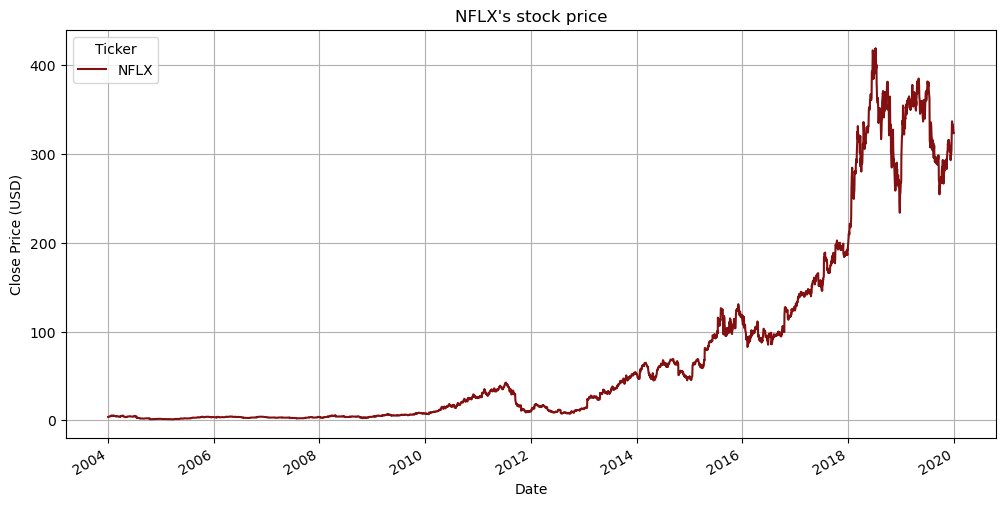

In [175]:
netflix_df['Close'].plot(title = "NFLX's stock price", color = "#831010", figsize=(12, 6))
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

#### Computing log returns using closing price (<b>e</b>)

In [191]:
netflix_returns = netflix_df["Close"]/netflix_df["Close"].shift(1)
netflix_log_returns = np.log(netflix_returns)["NFLX"]
## Dropping the null observation
netflix_log_returns2 = netflix_log_returns.dropna()
netflix_log_returns2

Date
2004-01-05    0.019327
2004-01-06    0.064259
2004-01-07    0.043175
2004-01-08   -0.002896
2004-01-09   -0.000967
                ...   
2019-12-24    0.000300
2019-12-26   -0.001712
2019-12-27   -0.010700
2019-12-30   -0.017720
2019-12-31    0.000804
Name: NFLX, Length: 4026, dtype: float64

#### Constructing a time plot of the daily log returns (<b>f</b>)

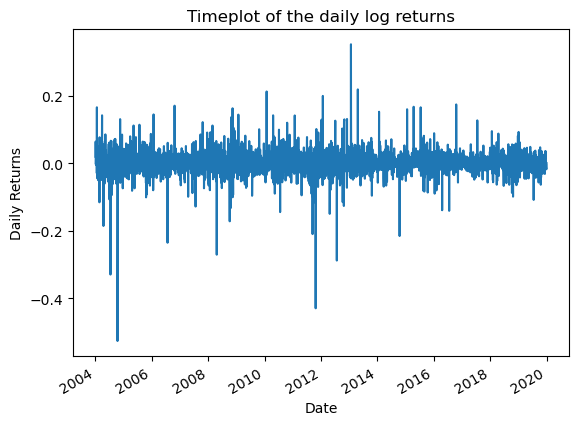

In [193]:
netflix_log_returns2.plot(title="Timeplot of the daily log returns")
plt.ylabel("Daily Returns")
plt.show()

#### Calculating the sample mean, standard deviation, minimum, and maximum of the daily log returns series (<b>g</b>)

In [195]:
netflix_log_returns2.describe().loc[['mean','std','min','max']]

mean    0.001096
std     0.034518
min    -0.526049
max     0.352230
Name: NFLX, dtype: float64

#### Constructing a historgram of the return series (<b>h</b>)

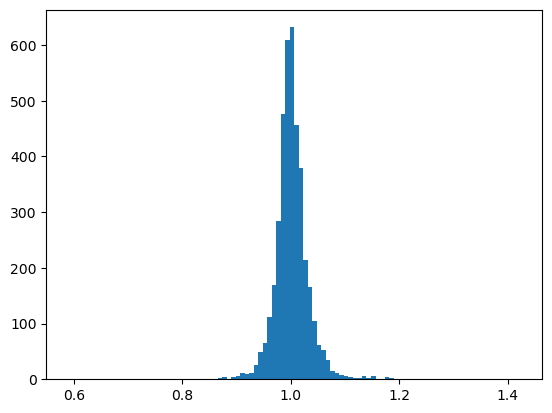

In [197]:
plt.hist(netflix_returns,bins=100)
plt.show()

#### Testing whether the mean of the daily log return is different from zero (<b>i</b>)
>Since `pvalue < 0.01`, we reject the Null Hypothesis (H<sub>0</sub>) and accept the Alternative Hypothesis (H<sub>a</sub>). Therefore, we conclude that the mean is different from zero.

In [199]:
stats.ttest_1samp(netflix_log_returns2, 0)

TtestResult(statistic=2.015425353081419, pvalue=0.04392644609665825, df=4025)

#### Summary of the analysis for Section 1 (<b>j</b>)

<b>NFLX's Stock Price</b> - (d)<br>
Up to 2010, the price of Netflix's stock remains pretty static with a slight increase happening just after. However at 2012, there seems to be a noticible dip in the stock price. Upon a quick search, it seems that in 2012 Netflix pushed the transition from renting DVDs to providing streaming services. They also gained a lot of competitors. The company lost a significant amount of subsricbers due to these changes, which is accurtely represented in the graph we generated.<br>
There is also a visible spike followed by a sharp dip in the graph around late 2018 where the price of the stock reached its highest point. According to more research, it seems that this happened in response to a disappointing subscriber count announcement in contrast to what was originally projected.<br>
[Source 1](https://www.nbcnews.com/id/wbna46114423) | [Source 2](https://money.usnews.com/investing/stock-market-news/articles/2018-07-16/netflix-inc-nflx-stock)<br>
<b>Timeplot of the daily log returns</b> - (f)<br>
The 2012 stock price dip is once again visible in our graph. It shows that their strategy of changing into a streaming service seems to have really hit the company hard in that period. However after that point, there does not seem to be as many visible log return changes in price that are depicted. So although the previous graph seemed to indicate the stock's price drop to be significant in late 2018, our graph reveals that because the price was already very high at that point, the overall log returns barely fluctuated.<br>
The timeplot graph actually points to another point in time with the biggest percent change increase in stock price, 2013. Fueled by several popular Netflix Original TV series, the company managed to gain and keep millions of new subscribers. Some even pronounced it as one of the best stocks of that year. This event was not as visible in the previous graph, which simply plotted raw returns without calculating the continuously compounded returns.<br>
In general, the daily logs return of Netflix's stock prices seems to be a little volatile, seeing as there are a number of heavy tails in the graph.<br>
[Source 1](https://www.latimes.com/entertainment/envelope/la-xpm-2013-apr-22-la-et-ct-netflix-adds-3-million-streaming-subscribers-worldwide-benefits-from-house-of-cards-halo-effect-20130422-story.html) | [Source 2](https://www.investors.com/how-to-invest/investors-corner/netflix-a-winner-in-2013/)<br>
<b>Daily Log Returns Statistics</b> - (g)<br>
The mean of the daily log returns is positive, so that indicates that the price of Netflix's stock steadly increased over the 15-year period we examined.<br>
The standard deviation cements our prior observation point about the Netflix stock prices being somewhat volatible, sitting at 3.4%.<br>
The minimum and maximum of the log return indicate the lowest and highest day-to-day loss/gain changes.<br>
<b>Histogram</b> - (h)<br>
The histogram illustrates that the daily log returns are symmetric with respect to its mean. This indicates that the returns follow a general pattern close to the mean, and that extreme highs and lows in the price are not very common.

<hr>

### <b>Section 2</b> - Chosen Stocks Monthly Prices Datasets
##### First dataset: Apple (AAPL)
##### Second dataset: Microsoft (MSFT)
##### Third dataset: Salesforce (CRM)<br>
##### <u>Section Code Split</u>
<ul>
    <li>Mina - d, e, f, g</li>
    <li>Carmen - a, b, c, l</li>
    <li>Gaayathri - h, i, j, k</li>
    <li>Jonathan - </li>   
</ul>

<hr>

#### Converting the CSV files to a dataframe (<b>a</b>)

In [7]:
tickers = ['AAPL', 'MSFT', 'CRM']  # Apple, Microsoft, Salesforce
start_date = '2005-01-01'
end_date = '2019-12-31'

stock_data = {}

for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
    stock_data[ticker] = data
    print(f"Data for {ticker} downloaded.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for AAPL downloaded.
Data for MSFT downloaded.


[*********************100%***********************]  1 of 1 completed

Data for CRM downloaded.


#### Choosing the adjusted closing price of the three stocks and formatting the price series in a single Data series (<b>b</b>)

In [9]:
adjusted_close = pd.concat([stock_data[ticker]['Adj Close'] if 'Adj Close' in stock_data[ticker].columns else stock_data[ticker]['Close'] for ticker in tickers], axis=1)
adjusted_close.columns = tickers

#### Seeing the size and type of the dataframe. (<b>c</b>)

In [11]:
adjusted_close.info()

print("Data Dimensions:", adjusted_close.shape)
print("Data Types:\n", adjusted_close.dtypes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    180 non-null    float64
 1   MSFT    180 non-null    float64
 2   CRM     180 non-null    float64
dtypes: float64(3)
memory usage: 5.6 KB
Data Dimensions: (180, 3)
Data Types:
 AAPL    float64
MSFT    float64
CRM     float64
dtype: object


#### Viewing the first 5 rows of the dataframe (<b>d</b>)

In [13]:
adjusted_close.head()

,AAPL,MSFT,CRM
Date,,,
2005-01-01,1.158371,18.237078,3.405976
2005-02-01,1.351483,17.459839,3.992699
2005-03-01,1.255379,16.824585,3.726685
2005-04-01,1.086368,17.611172,3.587462
2005-05-01,1.197837,17.959221,5.031895


#### Plotting the monthly prices of the three stocks (<b>e</b>)

Monthly Stock Prices of all three stocks

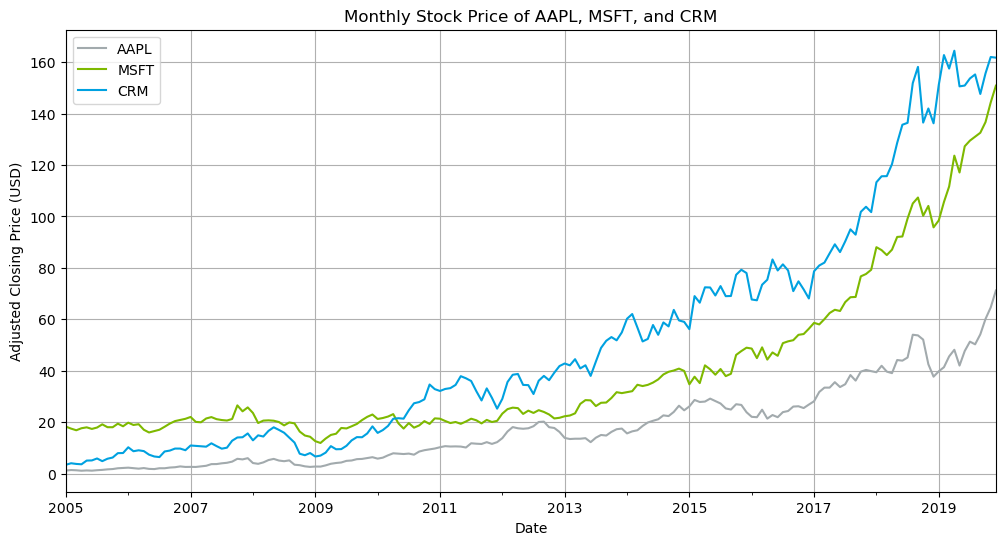

In [15]:
adjusted_close['AAPL'].plot(title = "Monthly Stock Price of AAPL, MSFT, and CRM", color = "#A2AAAD", figsize=(12, 6))
adjusted_close['MSFT'].plot(color = "#7EB900", figsize=(12, 6))
adjusted_close['CRM'].plot(color = "#00A1E0", figsize=(12, 6))
plt.ylabel('Adjusted Closing Price (USD)')
plt.grid(True)
plt.legend(['AAPL', 'MSFT', 'CRM'])
plt.show()

APPL Monthly Stock Prices

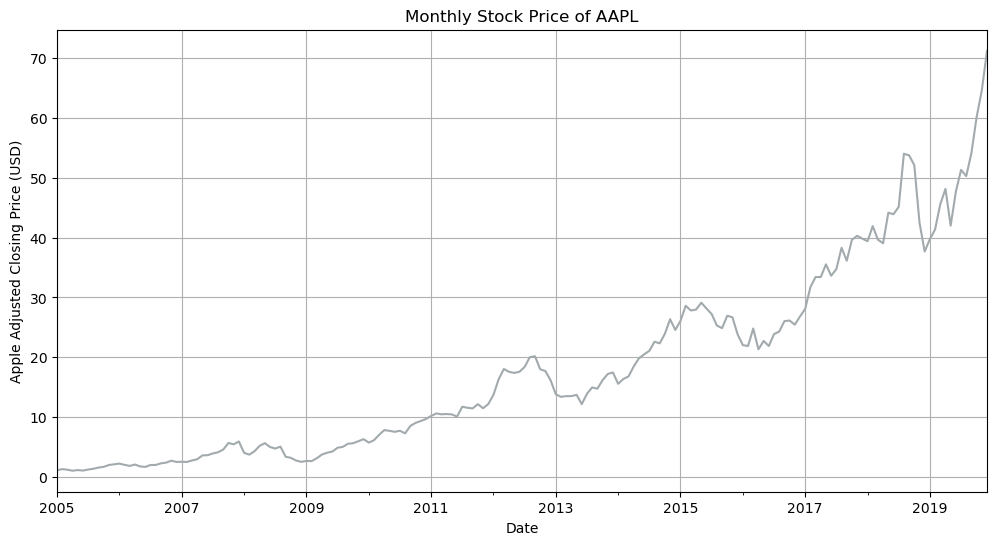

In [17]:
adjusted_close['AAPL'].plot(title = "Monthly Stock Price of AAPL", color = "#A2AAAD", figsize=(12, 6))
plt.ylabel('Apple Adjusted Closing Price (USD)')
plt.grid(True)
plt.show()

MSFT Monthly Stock Prices

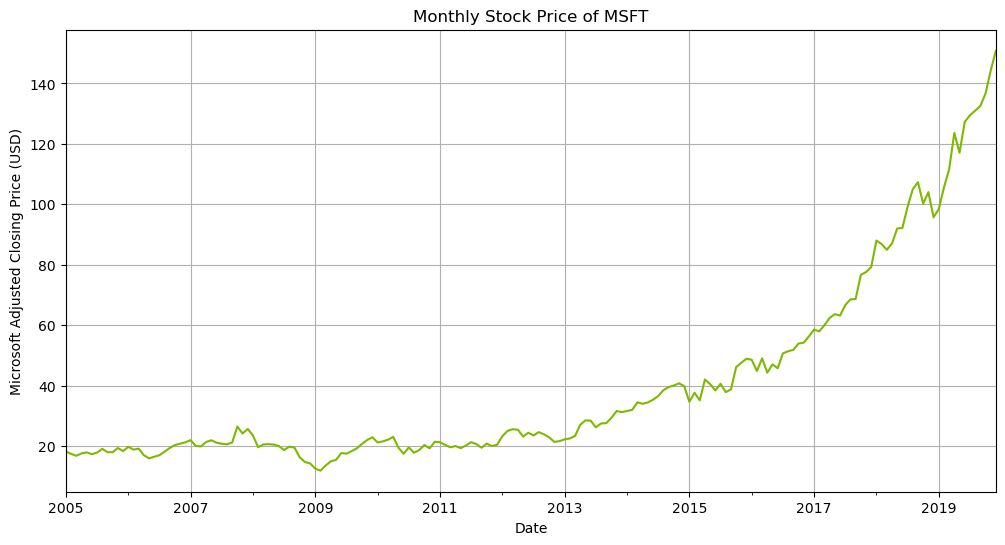

In [19]:
adjusted_close['MSFT'].plot(title = "Monthly Stock Price of MSFT", color = "#7EB900", figsize=(12, 6))
plt.ylabel('Microsoft Adjusted Closing Price (USD)')
plt.grid(True)
plt.show()

CRM Monthly Stock Prices

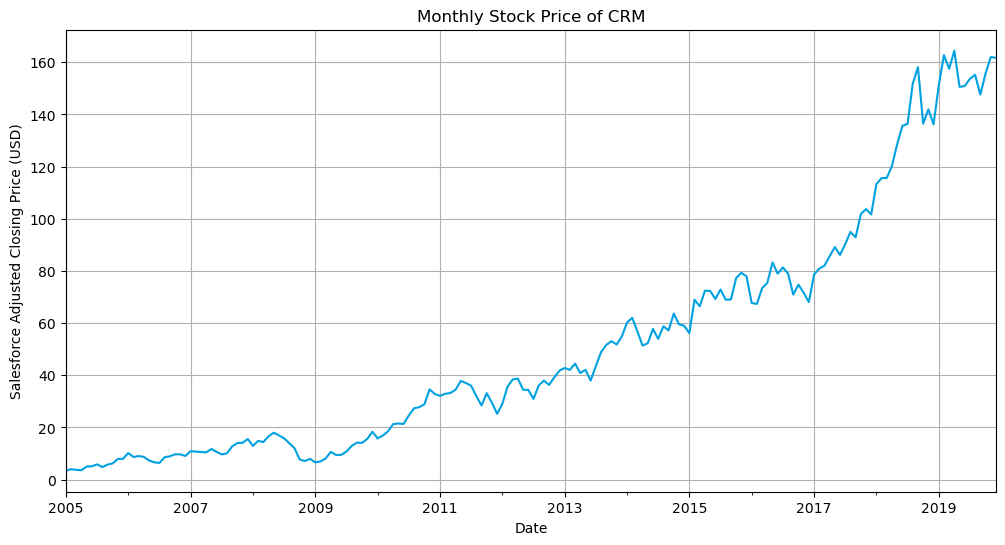

In [21]:
adjusted_close['CRM'].plot(title = "Monthly Stock Price of CRM", color = "#00A1E0", figsize=(12, 6))
plt.ylabel('Salesforce Adjusted Closing Price (USD)')
plt.grid(True)
plt.show()

#### Computing log returns using closing price, using functions, loops, etc. (<b>f</b>)

In [23]:
def monthly_log_returns(df, stocks):
    mlog_returns = pd.DataFrame(index = df.index)
    for stock in stocks:
        if stock in df.columns:
            mlog_returns[stock] = np.log(df[stock]/df[stock].shift(1))
        else:
            print("error")
    return mlog_returns
    
mlog_returns = monthly_log_returns(adjusted_close, tickers)
## Dropping the null observation
mlog_returns2 = mlog_returns.dropna()
mlog_returns2

,AAPL,MSFT,CRM
Date,,,
2005-02-01,0.154188,-0.043553,0.158936
2005-03-01,-0.073765,-0.037062,-0.068948
2005-04-01,-0.144597,0.045692,-0.038074
2005-05-01,0.097677,0.019570,0.338351
2005-06-01,-0.077092,-0.034752,0.011788
...,...,...,...
2019-08-01,-0.020390,0.011600,0.010111
2019-09-01,0.074215,0.011775,-0.050124
2019-10-01,0.104977,0.030739,0.052811


#### Plotting the monthly log returns of the three stocks (<b>g</b>)

Monthly Log Returns of all three stocks

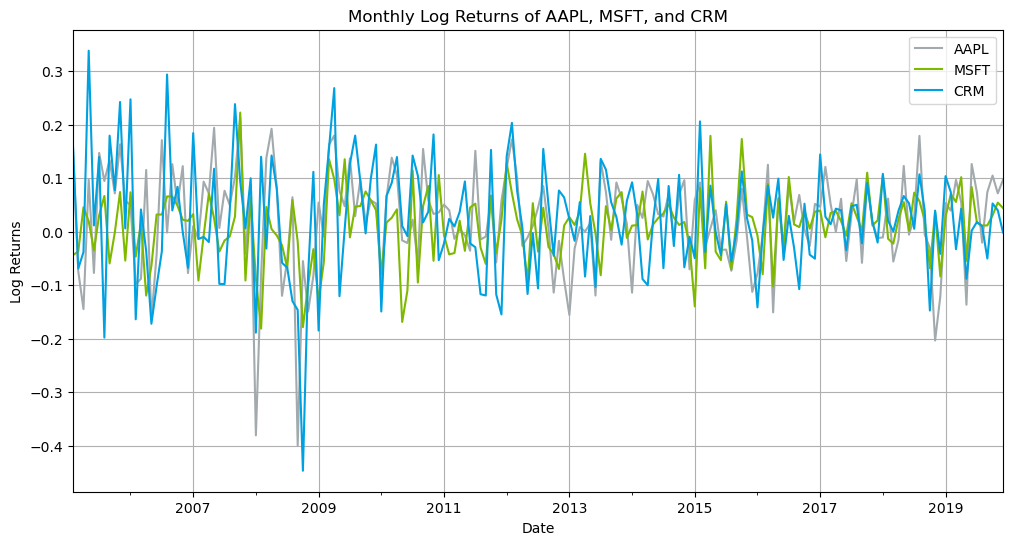

In [25]:
mlog_returns2['AAPL'].plot(title = "Monthly Log Returns of AAPL, MSFT, and CRM", color = "#A2AAAD", figsize=(12, 6))
mlog_returns2['MSFT'].plot(color = "#7EB900", figsize=(12, 6))
mlog_returns2['CRM'].plot(color = "#00A1E0", figsize=(12, 6))
plt.ylabel('Log Returns')
plt.grid(True)
plt.legend(['AAPL', 'MSFT', 'CRM'])
plt.show()

AAPL Monthly Stock Prices

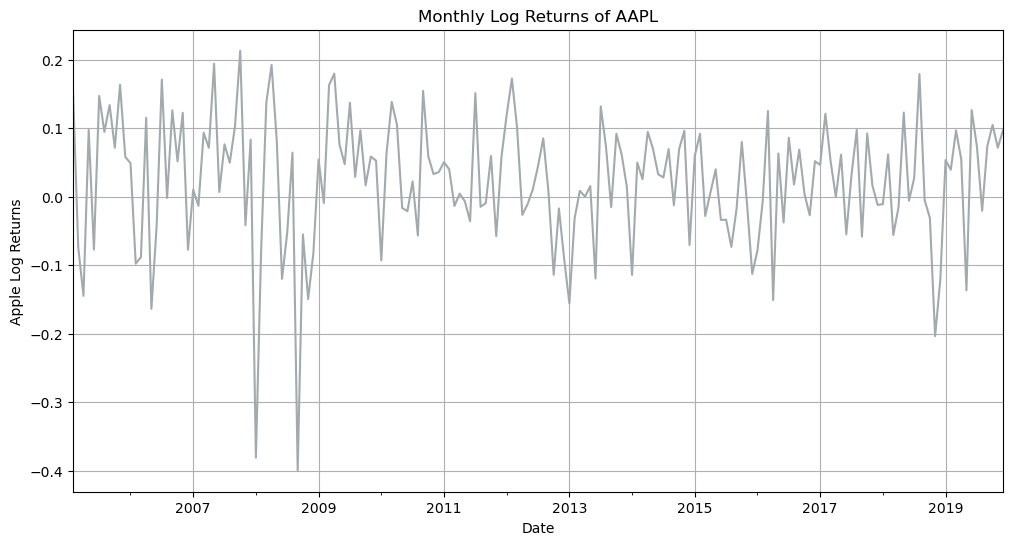

In [42]:
mlog_returns2['AAPL'].plot(title = "Monthly Log Returns of AAPL", color = "#A2AAAD", figsize=(12, 6))
plt.ylabel('Apple Log Returns')
plt.grid(True)
plt.show()

MSFT Monthly Stock Prices

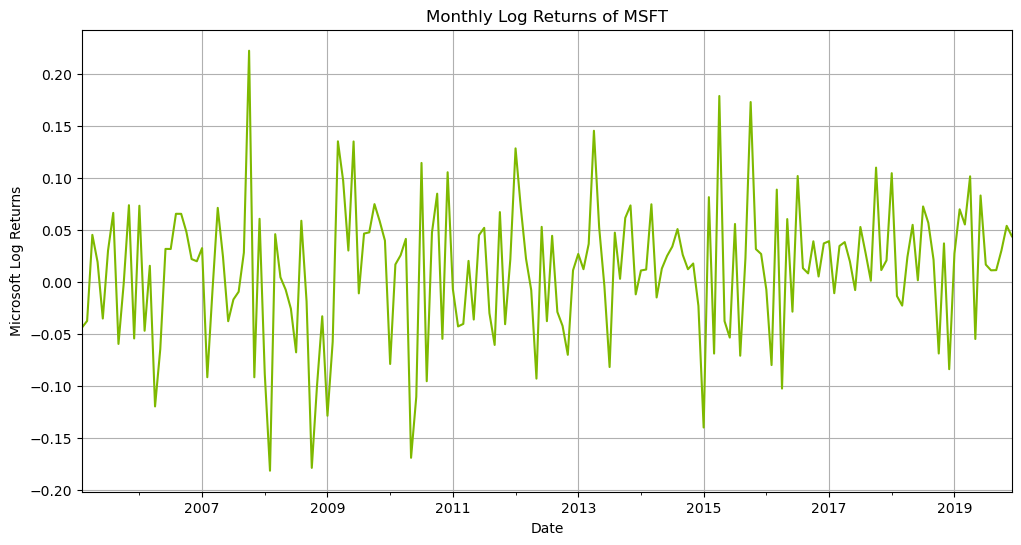

In [27]:
mlog_returns2['MSFT'].plot(title = "Monthly Log Returns of MSFT", color = "#7EB900", figsize=(12, 6))
plt.ylabel('Microsoft Log Returns')
plt.grid(True)
plt.show()

CRM Monthly Stock Prices

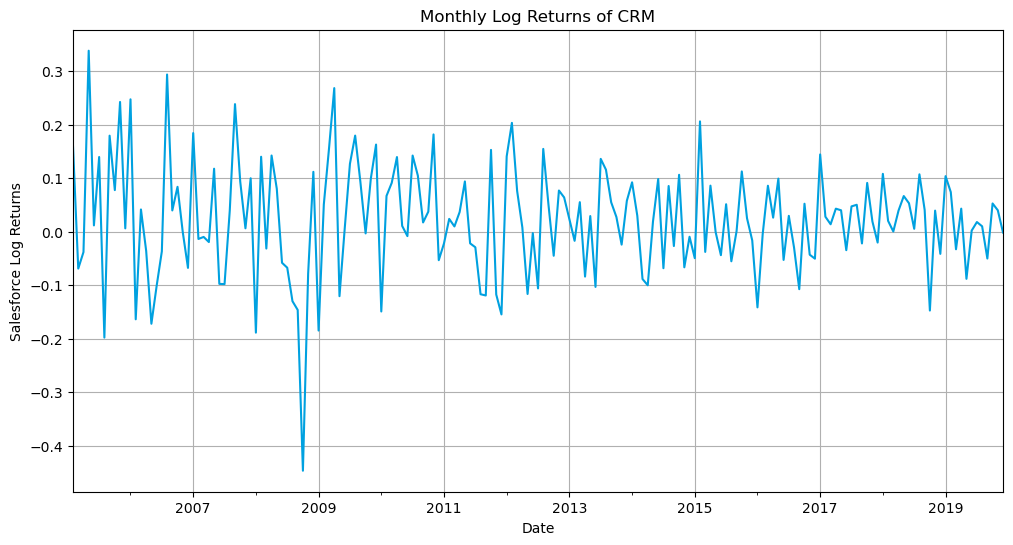

In [38]:
mlog_returns2['CRM'].plot(title = "Monthly Log Returns of CRM", color = "#00A1E0", figsize=(12, 6))
plt.ylabel('Salesforce Log Returns')
plt.grid(True)
plt.show()

#### Calculating the sample mean, standard deviation, minimum, and maximum of the monthly log returns series (<b>h</b>)

In [39]:
stats_summary = mlog_returns2.describe().T[['mean', 'std', 'min', 'max']]
print(stats_summary)

          mean       std       min       max
AAPL  0.023006  0.092824 -0.399818  0.213256
MSFT  0.011803  0.065309 -0.181095  0.222736
CRM   0.021567  0.104354 -0.446804  0.338351


#### Constructing a historgrams of the three return series (<b>i</b>)

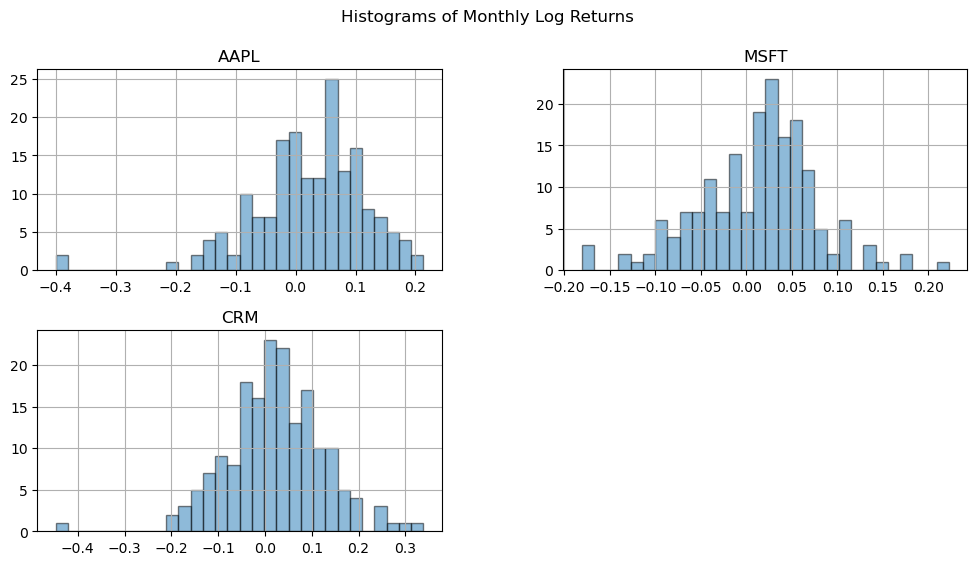

In [33]:
mlog_returns2.hist(bins=30, figsize=(12, 6), edgecolor='black', alpha=0.5)
plt.suptitle("Histograms of Monthly Log Returns")
plt.show()

#### Testing whether the mean of the daily log return is different from zero (<b>j</b>)

In [41]:
t_test_results = mlog_returns2.apply(lambda x: stats.ttest_1samp(x.dropna(), 0))
print(t_test_results)

       AAPL      MSFT       CRM
0  3.315949  2.417943  2.765034
1  0.001107  0.016617  0.006292


#### Computing the total HPR, the average annual HPR returns, and reporting the values in percentage (<b>k</b>)

In [37]:
total_HPR = np.exp(mlog_returns2.sum()) - 1
annual_HPR = np.exp(mlog_returns2.mean() * 12) - 1
print("Total HPR (%):\n", total_HPR * 100)
print("Average Annual HPR (%):\n", annual_HPR * 100)

Total HPR (%):
 AAPL    6044.157255
MSFT     727.093962
CRM     4648.613337
dtype: float64
Average Annual HPR (%):
 AAPL    31.794387
MSFT    15.215805
CRM     29.537509
dtype: float64


#### Summary of the analysis for Section 2 (<b>l</b>)